# Analysis of Seoul Bike Riding dataset 

### data exploration

In [2]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in csv file
bike_data = pd.read_csv('../data/SeoulBikeData.csv', encoding='ISO-8859-1')

# observe in first 3 entries
print(bike_data.head(3))

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  


In [5]:
# correctly format date feature
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')

# check data type has been changed
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [6]:
# convert object datatype to categorical datatype for categorical features
categorical_col = bike_data.select_dtypes(object).columns

for col in categorical_col:
    bike_data[col] = bike_data[col].astype('category')

# check that all features are in their correct datatypes in the dataframe
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

In [7]:
# zero duplicated data
print(f'No. of duplicated data: {bike_data[bike_data.duplicated()].shape[0]}')

# zero missing data
print(f'No. of missing data: {np.sum(bike_data.isna().sum())}')

No. of duplicated data: 0
No. of missing data: 0


In [8]:
# split X and y 
X = bike_data.drop('Rented Bike Count', axis=1)
y = bike_data[['Rented Bike Count']]

# verify feature counts 
print(f'original df shape: {bike_data.shape[0]} rows, {bike_data.shape[1]} columns')
print(f'features shape: {X.shape[0]} rows, {X.shape[1]} columns')
print(f'target shape: {y.shape[0]} rows, {y.shape[1]} columns\n')

# verify feature dataframe
print(f'feature names: {X.columns.to_list()}')
 

original df shape: 8760 rows, 14 columns
features shape: 8760 rows, 13 columns
target shape: 8760 rows, 1 columns

feature names: ['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [9]:
X.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature(°C),8760.0,12.882922,-17.8,3.5,13.7,22.5,39.4,11.944825
Humidity(%),8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind speed (m/s),8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility (10m),8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew point temperature(°C),8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.2,13.060369
Solar Radiation (MJ/m2),8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall(mm),8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193
Snowfall (cm),8760.0,0.075068,0.0,0.0,0.0,0.0,8.8,0.436746


Temperature and Dew temperature has high correlation (0.91) and we could possibly remove one of them.

<Axes: >

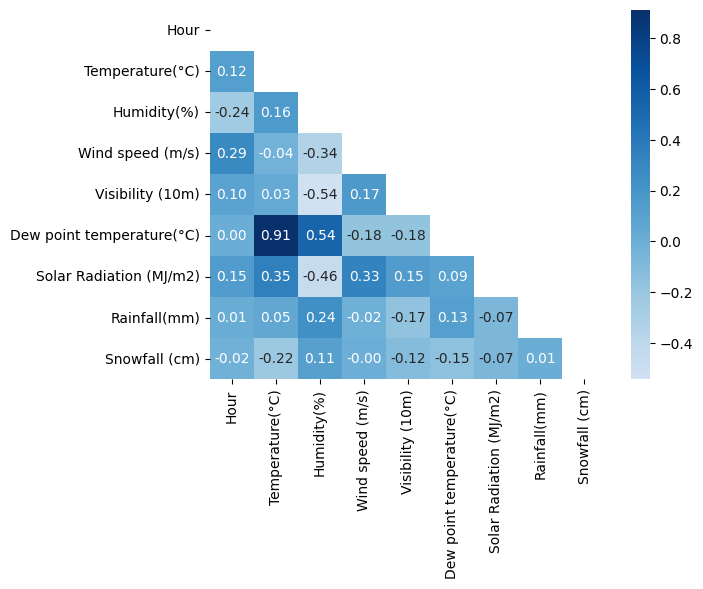

In [10]:
# numerical features
X_numeric = X.select_dtypes('number')

# explore correlation between numerical features using a heatmap
mask = np.triu(np.ones_like(X_numeric.corr(), dtype=bool))
sns.heatmap(data=X_numeric.corr( ), mask=mask, cmap='Blues', center=0, annot=True, fmt='.2f')

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

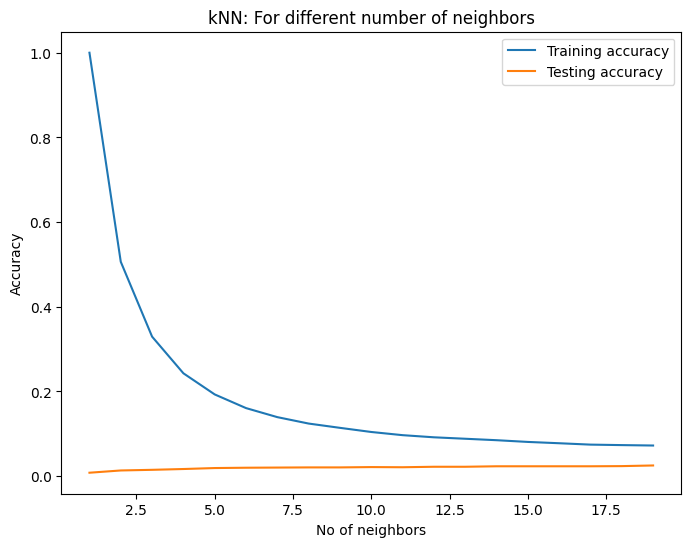

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_accuracies = { }
test_accuracies = { }
neighbors = np.arange(1, 20)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size = 0.3, random_state=21)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, 
                                                                              y_train)
    test_accuracies[neighbor] = knn.score(X_test,  
                                                                              y_test)

plt.figure(figsize=(8, 6))
plt.title('kNN: For different number of neighbors')
plt.plot(neighbors, train_accuracies.values( ), label='Training accuracy')
plt.plot(neighbors, test_accuracies.values( ), label='Testing accuracy')
plt.legend( ) 
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy')
plt.show( )

In [14]:
# using 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)

knn.score(X_test, y_test)

0.02054794520547945